## Introduction to network-based analysis in biomedicine with python (Part 2) [Solutions]

### Exercise session
SARS-Cov-2 infection requires binding of the virus spike protein to human ACE2 protein and priming of the spike protein by TMPRSS2. Use RWR to identify potential biomarkers for the disease.

<strong>Files to use:</strong>
Network: Data/STRING_Covid_net.csv

In [ ]:
# Upload python modules
import networkx as nx
import pandas as pd
# Import python modules for visualizations
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

81 368


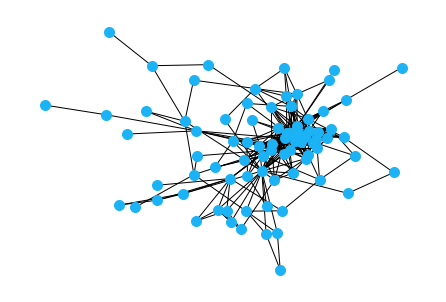

In [ ]:
# Reading the human interactome from Gysi et al., 2021 
edge_list = pd.read_csv("Data/STRING_Covid_net.csv")

# Creating network from edge list 
STRING_net = nx.from_pandas_edgelist(df = edge_list,
                                        source = "from_geneSymbol", 
                                        target = "to_geneSymbol",
                                        edge_attr = "combined_score")
STRING_net_pos = nx.spring_layout(STRING_net, seed = 123)
print(len(STRING_net.nodes()), len(STRING_net.edges()))
nx.draw(STRING_net, with_labels = False, pos = STRING_net_pos, node_size = 100, node_color = "#1BB3F5")

81 368


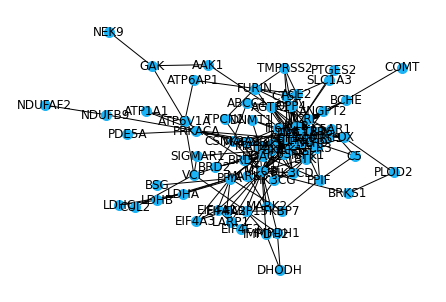

In [ ]:
# Remove self-loops
STRING_net.remove_edges_from(nx.selfloop_edges(STRING_net))

# Extract the largest connected component
STRING_net = list(STRING_net.subgraph(c).copy() for c in sorted(nx.connected_components(STRING_net), key = len, reverse = True))[0]
print(len(STRING_net.nodes()), len(STRING_net.edges()))
nx.draw(STRING_net, pos = STRING_net_pos, with_labels = True, node_size = 100, node_color = "#1BB3F5")


In [ ]:
# Prepare the seed node
seed_node = {"ACE2" : 1, "TMPRSS2" : 1}

In [ ]:
# Execute RWR on the network
rwr = nx.pagerank_numpy(STRING_net, personalization = seed_node)
rwr_df = pd.DataFrame.from_dict(rwr, orient = "index").reset_index()
rwr_df.columns = ["Protein", "Visiting probability"]
rwr_df.sort_values(by = ["Visiting probability"], ascending = False, inplace = True)
rwr_df.reset_index(drop = True, inplace = True)
rwr_df.head(11)

/tmp/ipykernel_161/482168772.py:3: DeprecationWarning: networkx.pagerank_numpy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  rwr = nx.pagerank_numpy(STRING_net, personalization = seed_node)
/root/venv/lib/python3.9/site-packages/networkx/algorithms/link_analysis/pagerank_alg.py:354: FutureWarning: google_matrix will return an np.ndarray instead of a np.matrix in
NetworkX version 3.0.
  M = google_matrix(


,Protein,Visiting probability
0,ACE2,0.121383
1,TMPRSS2,0.099272
2,TNF,0.052154
3,DPP4,0.050386
4,FURIN,0.046283
5,IL1B,0.045925
6,CTSL,0.044846
7,IL6,0.043674
8,CRP,0.028838
9,CXCL8,0.025306


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=567e54c1-8e1f-4560-8621-8b304ec1f642' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>